# Лабораторна робота 1. Дослідження та візуалізація даних за допомогою Python

In [1]:
N = ord("A") % 3 + 1
var = f"Variant {N}"
var

'Variant 3'

# Варіант 3. Дослідження втрат бронетранспортерів (БТР).
1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.
2. Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier).
3. Знайдіть добові втрати БТР.
4. Знайдіть 5 найбільших добових втрат БТР.
5. Визначте, скільки БТР було знищено влітку 2023 року.
6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.
7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

#### Вимоги до реалізації:
1. Використовуйте csv.reader()функцію для читання файлу csv.
2. Пропустіть перший рядок (із заголовками стовпців).
3. Не використовуйте цикли чи інші ітераційні конструкції для обробки масивів numpy. Використовуйте лише зрізи та/або універсальні (векторизовані) функції.
4. Створіть функції до завдань 3-7 кожного варіанта.

#### Вимоги до графіків:
- встановити тип лінії (пунктирна, пунктирна тощо);
- графіки повинні бути підписані;
- додайте легенду;
- додати сітку та вказати колір і тип ліній;
- додайте назву графіку, позначки осей і значення но осях;
- змінити розмір графіку (наприклад, 8x16 дюймів) і розподільну здатність (наприклад, 100 dpi);
- зберегти графік у файл формату png.

In [2]:
# Завдання 1.
# Функція, що приймає назву файлу та назву стовпця як параметр 
# та повертає масив NumPy зі значеннями стовпця.

import numpy as np
import csv

FILE_PATH = 'russia_losses_equipment.csv'
COLUMN_NAME = 'APC', 'date'


def get_data_form_csv(file_path, column_name):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        data = []
        for row in reader:
            index = header.index(column_name)
            value = row[index]
            if column_name == 'date':
                data.append(np.datetime64(value))
            else:
                data.append(int(value))
                
    dtype = 'datetime64[D]' if column_name == 'date' else int
    return np.array(data, dtype=dtype)

In [3]:
# Завдання 2.
# Масив NumPy зі значень стовпця 'APC'.
# Дані у масиві відсортовані у хронологічному порядку.

apc_losses = get_data_form_csv(FILE_PATH, COLUMN_NAME[0])[::-1]
apc_losses

array([  516,   706,   706,   816,   846,   862,   900,   939,   945,
         985,   999,  1036,  1070,  1105,  1165,  1205,  1226,  1249,
        1279,  1375,  1435,  1448,  1470,  1487,  1535,  1556,  1578,
        1597,  1625,  1640,  1664,  1694,  1710,  1723,  1735,  1751,
        1776,  1830,  1844,  1858,  1861,  1891,  1891,  1895,  1911,
        1923,  1946,  1964,  1968,  1976,  1982,  2002,  2041,  2063,
        2087,  2118,  2162,  2205,  2238,  2258,  2308,  2342,  2389,
        2418,  2445,  2471,  2519,  2567,  2610,  2651,  2686,  2713,
        2741,  2764,  2808,  2856,  2873,  2900,  2934,  2958,  2974,
        3009,  3043,  3063,  3090,  3116,  3141,  3166,  3194,  3213,
        3235,  3246,  3258,  3270,  3282,  3302,  3343,  3354,  3366,
        3379,  3392,  3400,  3416,  3429,  3438,  3450,  3466,  3484,
        3492,  3503,  3528,  3545,  3563,  3573,  3577,  3588,  3606,
        3614,  3632,  3637,  3645,  3659,  3687,  3704,  3720,  3726,
        3736,  3737,

In [4]:
# Завдання 3.
# Добові втрати БТР.

daily_apc_losses = np.diff(apc_losses)
daily_apc_losses

array([190,   0, 110,  30,  16,  38,  39,   6,  40,  14,  37,  34,  35,
        60,  40,  21,  23,  30,  96,  60,  13,  22,  17,  48,  21,  22,
        19,  28,  15,  24,  30,  16,  13,  12,  16,  25,  54,  14,  14,
         3,  30,   0,   4,  16,  12,  23,  18,   4,   8,   6,  20,  39,
        22,  24,  31,  44,  43,  33,  20,  50,  34,  47,  29,  27,  26,
        48,  48,  43,  41,  35,  27,  28,  23,  44,  48,  17,  27,  34,
        24,  16,  35,  34,  20,  27,  26,  25,  25,  28,  19,  22,  11,
        12,  12,  12,  20,  41,  11,  12,  13,  13,   8,  16,  13,   9,
        12,  16,  18,   8,  11,  25,  17,  18,  10,   4,  11,  18,   8,
        18,   5,   8,  14,  28,  17,  16,   6,  10,   1,   7,   0,  28,
        17,   8,  14,   4,   8,   5,   1,   3,   0,  34,   8,   5,   7,
         6,  13,   7,   8,   9,  13,   8,   9,  12,   8,   8,   8,   9,
         7,   3,   8,   4,   6,  19,   4,  15,   6,  10,  14,   8,   7,
        11,  15,  11,  10,  17,  16,  17,  12,   6,   8,   5,   

In [5]:
# Завдання 4.
# 5 найбільших добових втрат БТР відсортованих за зменшенням.

top_5_daily_apc_losses = np.sort(daily_apc_losses)[-5:][::-1]
top_5_daily_apc_losses

array([190, 120, 110,  96,  91])

In [6]:
# Завдання 5. 
# Кількість БТР, що було знищено влітку у 2023 році.

dates = get_data_form_csv(FILE_PATH, COLUMN_NAME[1])[::-1]
index_start = np.where(dates == np.datetime64('2023-06-01'))[0][0]
index_end = np.where(dates == np.datetime64('2023-09-01'))[0][0]
summer_2023_apc_losses = np.sum(daily_apc_losses[index_start:index_end])
summer_2023_apc_losses

np.int64(1135)

In [7]:
# Завдання 6.
# Середнє значення знищених БТР за період з 100-го по 500-ий день війни.

avg_apc_losses = np.mean(daily_apc_losses[100:501])
avg_apc_losses

np.float64(11.448877805486283)

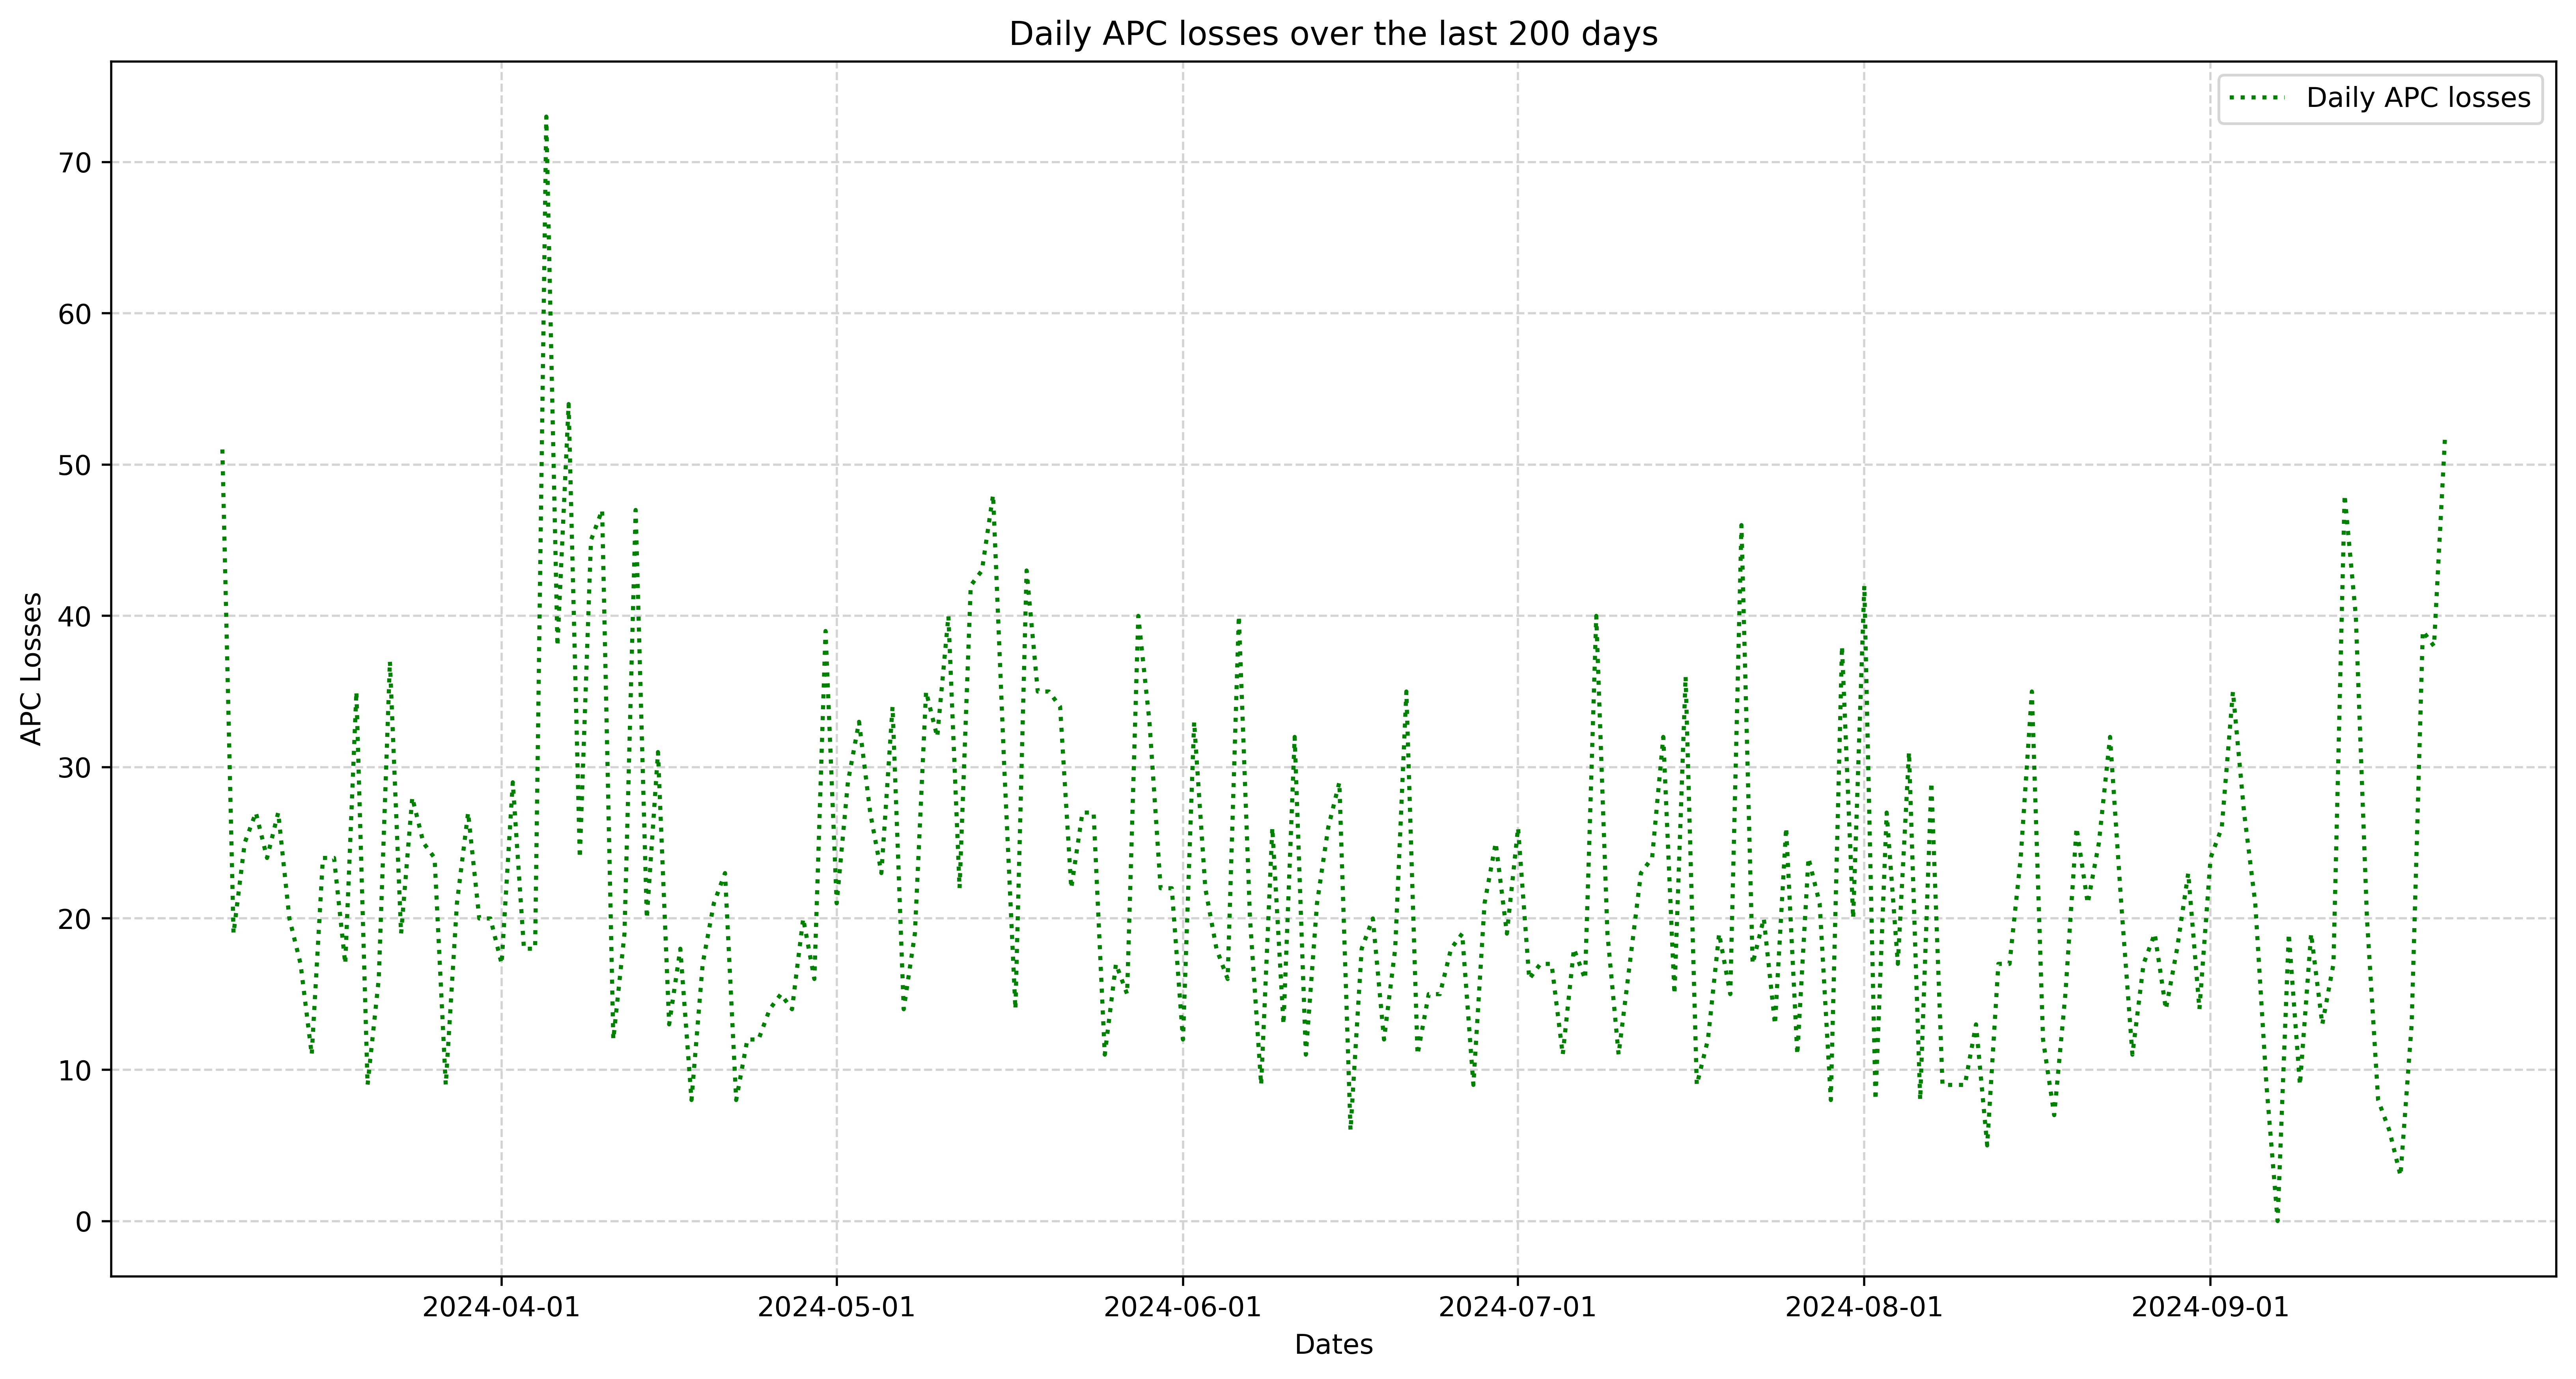

In [8]:
# Завдання 7.
# Графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних).

import matplotlib.pyplot as plt

x = dates[-200:]
y = daily_apc_losses[-200:]

plt.figure(figsize=(16, 8), dpi=500)

plt.plot(x, y, label='Daily APC losses', color='green', linestyle='dotted')

plt.title(label='Daily APC losses over the last 200 days')
plt.ylabel(ylabel='APC Losses')
plt.xlabel(xlabel='Dates')
plt.legend(loc='upper right')

plt.grid(color='lightgray', linestyle='--')

xticks = x[np.char.endswith(x.astype(str), '-01')]
plt.xticks(ticks=xticks)

plt.savefig(fname='daily_apc_losses.png')